---

# Artificial Intelligence - COMPSCI4004/5087 2019-2020

## Lab Week 4: Search <small><small><small>v20192020b</small></small></small>

----

**Aim**

We will examine how a particular class of AI-problems can be solved using classical search techniques such as A-star. We will formulate a Maze-navigation problem as a graph-search problem in Python and use the `AIMA Toolbox` (https://github.com/aimacode/aima-python) to suggest a solution (i.e., a set of actions) which hopefully leads the agent from the initial state to the goal state. We will furthermore explore the limitations of A-star for general Maze-navigation problems. 

**Objectives:**
* Formulate the agent function as an graph-search problem based on the PEAS analysis/characterization
* Get hands-on experience with A* and heuristic functions
* Appreciate the limitations of A-star for general navigation problems

**Guide**:

The notebook has two parts:
   - Part I (Q4.0-Q4.3): Runs through the basics of A-star without you having to write a lot of code but you should be focused on   inspecting and understanding the problem and A-star algorithm.
   - Part II (Q4.4): In the second part, we ask you to solve the Open AI Gym FrozenLake problem using A-star. This is an open-ended task and requires more programming from you.

Each part contains specific tasks - often open-ended questions - that you'll need to carry out to make the notebook run or be able to undersatnd the next steps. These are indicated with:

* <font color=dark-magenta>TASK:</font> This is a task for you to carry out before proceeding. 
* <font color=green>CHECKPOINTS:</font> This indicates a key point you should understand before proceeding. If you're in doubt then ask then consult the lab assistants.
* A basic model solution (marked with <font color=red>SOLUTION</font>) will be provided a week after the Lab session.



---
### Q4.0 Prerequisites / housekeeping

The notebook relies on the following software:
- A Python 3.6+ environment and additional pacakges (see the imports in sec Q4.0 for specific requirements)
- **AIMA Toolbox**:comes with the book (free) and contains off-the-shelf implementations of various search algorithms and many other relevant methods.Howver, we reocmmend you download a special as the github version is unstable and a few fixes have been made offline - you can download it from here: https://moodle.gla.ac.uk/mod/resource/view.php?id=1374098

#### Q4.0.1 Import the basics

* <font color=dark-magenta>TASK:</font> Run the follwing cell which loads the very basic Python modules and checks the environmental variables


In [64]:
# Check the very basics
import os, sys
print("Working dir:"+os.getcwd())
print("Python version:"+sys.version)


Working dir:D:\project\python\artificial-intelligence\week_4
Python version:3.6.5 (v3.6.5:f59c0932b4, Mar 28 2018, 17:00:18) [MSC v.1900 64 bit (AMD64)]


#### Q4.0.2 Import Python core modules

* <font color=dark-magenta>TASK:</font> Run the following code to import core Python models


In [65]:
from copy import deepcopy 
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import lines


#### Q4.0.2 Import Python Network/Graph modules

* <font color=dark-magenta>TASK:</font> Run the cell to import the graph module allowing you to work with graphs in Python:


In [66]:
import networkx as nx
print("networkx version:"+nx.__version__)


networkx version:2.3


#### Q4.0.2 Import Python visualization modules


* <font color=dark-magenta>TASK:</font> Import modules which allows you to visualise the graphs and solutions. Note: You can skip this step if you fail installing the the `ipywidgets` Python package however you will not be able to interactively visualize the graphs and solutions. `ipywidgets`  is easy to install ia the Anaconda packagae but can be tricky to run on custom Python setups in which case we recommend skipping the step.


In [67]:
from ipywidgets import interact
import ipywidgets as widgets
from IPython.display import display
print("ipywidgets version:" + widgets.__version__)


ipywidgets version:7.5.0


#### Q4.0.2 Import the AIMA Toolbox



* <font color=dark-magenta>TASK:</font> Download/pull the AIMA toolbox from https://moodle.gla.ac.uk/mod/resource/view.php?id=1374098

* <font color=dark-magenta>TASK:</font> Import the AIMA toolbox into the search path. Remember to change the `AIMA_TOOLBOX_ROOT` variable to match the relevant folder on your system


In [68]:
# Add path the to the AIMA Python Toolbox folder on your system
# WARNING: It is important that you use forward slash, even on Windows machines !

AIMA_TOOLBOX_ROOT="D:/project/python/aima-python-uofg_v20192020b"
sys.path.append(AIMA_TOOLBOX_ROOT)


* <font color=dark-magenta>TASK:</font>  Run the follwing code to import the search packe in the AIMA toolbox


In [69]:
from search import *
from notebookutils import psource, heatmap, gaussian_kernel, show_map, final_path_colors, display_visual, plot_NQueens
# Needed to hide warnings in the matplotlib sections
import warnings
warnings.filterwarnings("ignore")


... you should now be ready to solve a AI problem.

----

### Q4.1 The Maze


Figure 1 shows a Maze. You are now given the task to design an intelligent agent that plan a route from S (with coordinates (0,0)) to G (with coordinates (1,9) ).


<img src="resources/maze.png" width=40%>
<center>Figure 1: A Maze</center>


In the follwing, we will explore how to approach this problem and implement a reasonable solution in Pyhton.


---


#### Q4.1.1 Analysis

- <font color=dark-magenta>TASK:</font> As always, analyse the problem and task environment using the PEAS framework. Note: you will need to make assumptions; make sure to state them:

    - Performance measure
        - As the designer of the Maze-solving agent, define a suitable performance measure?
    - Environment
        - Characterise the task environment along the dimensions outlined in AIMA Chapter 2 (lecture 1)?
    - Actuators        
        - Provide a list of actuators and possible actions ?
    - Sensors
        - Determine the percept available to the Maze-solving agent ?


----


#### Q4.1.2 Problem representation via graphs


In this part we will build a graph representation of the state-space including the actions (similar to the Romania graph in lecture 3) __assuming__ it is discrete, fully observable, static, deterministic and known.


##### Q4.1.2 (a) Define states and actions in a table


- <font color=dark-magenta>TASK:</font>: Run the cells to define your state-space as a table Hint: the S state is (0,0) and the G state is (1.9) !). Double check that the code provided below is correct!
 - Hint: `S_08_00=dict(S_09_00=1,S_07_00=1)` means that we have a unique state "S_08_00" from which you can get to S_09_00 and S_07_00 with cost 1.


In [70]:
maze_map = UndirectedGraph(dict(
    S_00_00=dict(S_01_00=1),
    S_01_00=dict(S_01_01=1),
    S_03_00=dict(S_04_00=1,S_03_01=1),
    S_04_00=dict(S_03_00=1),
    S_07_00=dict(S_08_00=1),
    S_08_00=dict(S_09_00=1,S_07_00=1),
    S_09_00=dict(S_08_00=1,S_09_01=1),
    S_01_01=dict(S_01_00=1,S_02_01=1),
    S_02_01=dict(S_01_01=1,S_03_01=1),
    S_03_01=dict(S_03_00=1,S_03_02=1),
    S_09_01=dict(S_09_00=1),
    S_03_02=dict(S_03_01=1,S_04_02=1),
    S_04_02=dict(S_03_02=1,S_05_02=1,S_04_03=1),
    S_05_02=dict(S_04_02=1,S_05_03=1),
    S_01_03=dict(S_01_04=1,S_02_03=1),
    S_02_03=dict(S_01_03=1,S_02_04=1),
    S_04_03=dict(S_04_02=1,S_05_03=1,S_04_04=1),
    S_05_03=dict(S_05_02=1,S_06_03=1,S_04_03=1,S_05_04=1),
    S_06_03=dict(S_05_03=1,S_06_04=1),
    S_08_03=dict(S_08_04=1),
    S_01_04=dict(S_01_03=1,S_02_04=1),
    S_02_04=dict(S_01_04=1,S_02_05=1,S_02_03=1,S_03_04=1),
    S_03_04=dict(S_03_05=1,S_02_04=1,S_04_04=1),
    S_04_04=dict(S_04_03=1,S_03_04=1,S_05_04=1),
    S_05_04=dict(S_04_04=1,S_05_05=1,S_06_04=1,S_05_03=1),
    S_06_04=dict(S_06_03=1,S_07_04=1,S_05_04=1),
    S_07_04=dict(S_06_04=1,S_07_05=1,S_08_04=1),
    S_08_04=dict(S_07_04=1,S_08_03=1,S_08_05=1),
    S_00_05=dict(S_00_06=1),
    S_02_05=dict(S_02_06=1,S_02_04=1,S_03_05=1),
    S_03_05=dict(S_02_05=1,S_03_04=1),
    S_05_05=dict(S_05_04=1,S_05_06=1),
    S_07_05=dict(S_08_05=1,S_07_04=1,S_07_06=1),
    S_08_05=dict(S_09_05=1,S_07_05=1,S_08_04=1),
    S_09_05=dict(S_09_06=1,S_08_05=1),
    S_00_06=dict(S_00_07=1,S_00_05=1,S_01_06=1),
    S_01_06=dict(S_00_06=1,S_01_07=1,S_02_06=1),
    S_02_06=dict(S_02_07=1,S_02_05=1,S_01_06=1),
    S_04_06=dict(S_05_06=1,S_04_07=1),
    S_05_06=dict(S_04_06=1,S_06_06=1,S_05_05=1,S_05_07=1),
    S_06_06=dict(S_07_06=1,S_06_07=1,S_05_06=1),
    S_07_06=dict(S_06_06=1,S_07_05=1),
    S_09_06=dict(S_09_05=1,S_09_07=1),
    S_00_07=dict(S_00_08=1,S_01_07=1,S_00_06=1),
    S_01_07=dict(S_00_07=1,S_02_07=1,S_01_08=1,S_01_06=1),
    S_02_07=dict(S_01_07=1,S_03_07=1,S_02_06=1,S_02_08=1),
    S_03_07=dict(S_04_07=1,S_02_07=1),
    S_04_07=dict(S_03_07=1,S_05_07=1,S_04_08=1,S_04_06=1),
    S_05_07=dict(S_04_07=1,S_06_07=1,S_05_08=1,S_05_06=1),
    S_06_07=dict(S_06_06=1,S_06_08=1,S_05_07=1),
    S_08_07=dict(S_09_07=1),
    S_09_07=dict(S_08_07=1,S_09_06=1),
    S_00_08=dict(S_00_09=1,S_01_08=1,S_00_07=1),
    S_01_08=dict(S_00_08=1,S_02_08=1,S_01_09=1,S_01_07=1),
    S_02_08=dict(S_02_09=1,S_02_07=1,S_01_08=1),
    S_04_08=dict(S_04_09=1,S_05_08=1,S_04_07=1),
    S_05_08=dict(S_04_08=1,S_06_08=1,S_05_09=1,S_05_07=1),
    S_06_08=dict(S_07_08=1,S_06_07=1,S_05_08=1),
    S_07_08=dict(S_07_09=1,S_06_08=1),
    S_01_09=dict(S_01_08=1),
    S_00_09=dict(S_01_09=1,S_00_08=1),
    S_02_09=dict(S_01_09=1,S_02_08=1),
    S_04_09=dict(S_04_08=1,S_05_09=1),
    S_05_09=dict(S_05_08=1,S_04_09=1),
    S_07_09=dict(S_07_08=1)))

In [71]:
maze_map.locations = dict(
    S_00_00=(0,0),
    S_01_00=(1,0),
    S_03_00=(3,0),
    S_04_00=(4,0),
    S_07_00=(7,0),
    S_08_00=(8,0),
    S_09_00=(9,0),
    S_01_01=(1,1),
    S_02_01=(2,1),
    S_03_01=(3,1),
    S_09_01=(9,1),
    S_03_02=(3,2),
    S_04_02=(4,2),
    S_05_02=(5,2),
    S_01_03=(1,3),
    S_02_03=(2,3),
    S_04_03=(4,3),
    S_05_03=(5,3),
    S_06_03=(6,3),
    S_08_03=(8,3),
    S_01_04=(1,4),
    S_02_04=(2,4),
    S_03_04=(3,4),
    S_04_04=(4,4),
    S_05_04=(5,4),
    S_06_04=(6,4),
    S_07_04=(7,4),
    S_08_04=(8,4),
    S_00_05=(0,5),
    S_02_05=(2,5),
    S_03_05=(3,5),
    S_05_05=(5,5),
    S_07_05=(7,5),
    S_08_05=(8,5),
    S_09_05=(9,5),
    S_00_06=(0,6),
    S_01_06=(1,6),
    S_02_06=(2,6),
    S_04_06=(4,6),
    S_05_06=(5,6),
    S_06_06=(6,6),
    S_07_06=(7,6),
    S_09_06=(9,6),
    S_00_07=(0,7),
    S_01_07=(1,7),
    S_02_07=(2,7),
    S_03_07=(3,7),
    S_04_07=(4,7),
    S_05_07=(5,7),
    S_06_07=(6,7),
    S_08_07=(8,7),
    S_09_07=(9,7),
    S_00_08=(0,8),
    S_01_08=(1,8),
    S_02_08=(2,8),
    S_04_08=(4,8),
    S_05_08=(5,8),
    S_06_08=(6,8),
    S_07_08=(7,8),
    S_00_09=(0,9),
    S_01_09=(1,9),
    S_02_09=(2,9),
    S_04_09=(4,9),
    S_05_09=(5,9),
    S_07_09=(7,9))

maze_map_locations = maze_map.locations


In [72]:
print("----------------------------") 
print("Unique states (i.e.locations) and possible actions in those states:\n") 
print(maze_map.locations) 

----------------------------
Unique states (i.e.locations) and possible actions in those states:

{'S_00_00': (0, 0), 'S_01_00': (1, 0), 'S_03_00': (3, 0), 'S_04_00': (4, 0), 'S_07_00': (7, 0), 'S_08_00': (8, 0), 'S_09_00': (9, 0), 'S_01_01': (1, 1), 'S_02_01': (2, 1), 'S_03_01': (3, 1), 'S_09_01': (9, 1), 'S_03_02': (3, 2), 'S_04_02': (4, 2), 'S_05_02': (5, 2), 'S_01_03': (1, 3), 'S_02_03': (2, 3), 'S_04_03': (4, 3), 'S_05_03': (5, 3), 'S_06_03': (6, 3), 'S_08_03': (8, 3), 'S_01_04': (1, 4), 'S_02_04': (2, 4), 'S_03_04': (3, 4), 'S_04_04': (4, 4), 'S_05_04': (5, 4), 'S_06_04': (6, 4), 'S_07_04': (7, 4), 'S_08_04': (8, 4), 'S_00_05': (0, 5), 'S_02_05': (2, 5), 'S_03_05': (3, 5), 'S_05_05': (5, 5), 'S_07_05': (7, 5), 'S_08_05': (8, 5), 'S_09_05': (9, 5), 'S_00_06': (0, 6), 'S_01_06': (1, 6), 'S_02_06': (2, 6), 'S_04_06': (4, 6), 'S_05_06': (5, 6), 'S_06_06': (6, 6), 'S_07_06': (7, 6), 'S_09_06': (9, 6), 'S_00_07': (0, 7), 'S_01_07': (1, 7), 'S_02_07': (2, 7), 'S_03_07': (3, 7), 'S_04_07

---

##### Q4.1.2 (b) Create the graph object

- <font color=dark-magenta>TASK:</font>: Execute the following cell to define a graph object based on the map and transition models defined in the previous question.

In [73]:
# node colors, node positions and node label positions
node_colors = {node: 'white' for node in maze_map.locations.keys()}
node_positions = maze_map.locations
node_label_pos = { k:[v[0],v[1]-10]  for k,v in maze_map.locations.items() }
edge_weights = {(k, k2) : v2 for k, v in maze_map.graph_dict.items() for k2, v2 in v.items()}

maze_graph_data = {  'graph_dict' : maze_map.graph_dict,
                        'node_colors': node_colors,
                        'node_positions': node_positions,
                        'node_label_positions': node_label_pos,
                         'edge_weights': edge_weights
                     }

print("Done creating the graph object")

Done creating the graph object


In [74]:
maze_graph_data

{'graph_dict': {'S_00_00': {'S_01_00': 1},
  'S_01_00': {'S_01_01': 1, 'S_00_00': 1},
  'S_03_00': {'S_04_00': 1, 'S_03_01': 1},
  'S_04_00': {'S_03_00': 1},
  'S_07_00': {'S_08_00': 1},
  'S_08_00': {'S_09_00': 1, 'S_07_00': 1},
  'S_09_00': {'S_08_00': 1, 'S_09_01': 1},
  'S_01_01': {'S_01_00': 1, 'S_02_01': 1},
  'S_02_01': {'S_01_01': 1, 'S_03_01': 1},
  'S_03_01': {'S_03_00': 1, 'S_03_02': 1, 'S_02_01': 1},
  'S_09_01': {'S_09_00': 1},
  'S_03_02': {'S_03_01': 1, 'S_04_02': 1},
  'S_04_02': {'S_03_02': 1, 'S_05_02': 1, 'S_04_03': 1},
  'S_05_02': {'S_04_02': 1, 'S_05_03': 1},
  'S_01_03': {'S_01_04': 1, 'S_02_03': 1},
  'S_02_03': {'S_01_03': 1, 'S_02_04': 1},
  'S_04_03': {'S_04_02': 1, 'S_05_03': 1, 'S_04_04': 1},
  'S_05_03': {'S_05_02': 1, 'S_06_03': 1, 'S_04_03': 1, 'S_05_04': 1},
  'S_06_03': {'S_05_03': 1, 'S_06_04': 1},
  'S_08_03': {'S_08_04': 1},
  'S_01_04': {'S_01_03': 1, 'S_02_04': 1},
  'S_02_04': {'S_01_04': 1, 'S_02_05': 1, 'S_02_03': 1, 'S_03_04': 1},
  'S_03_04':

----

##### Q4.1.2 (c) Visualise the graph

- <font color=dark-magenta>TASK:</font>:  Execute the cells to visualize the graph and check that everything looks as expected:

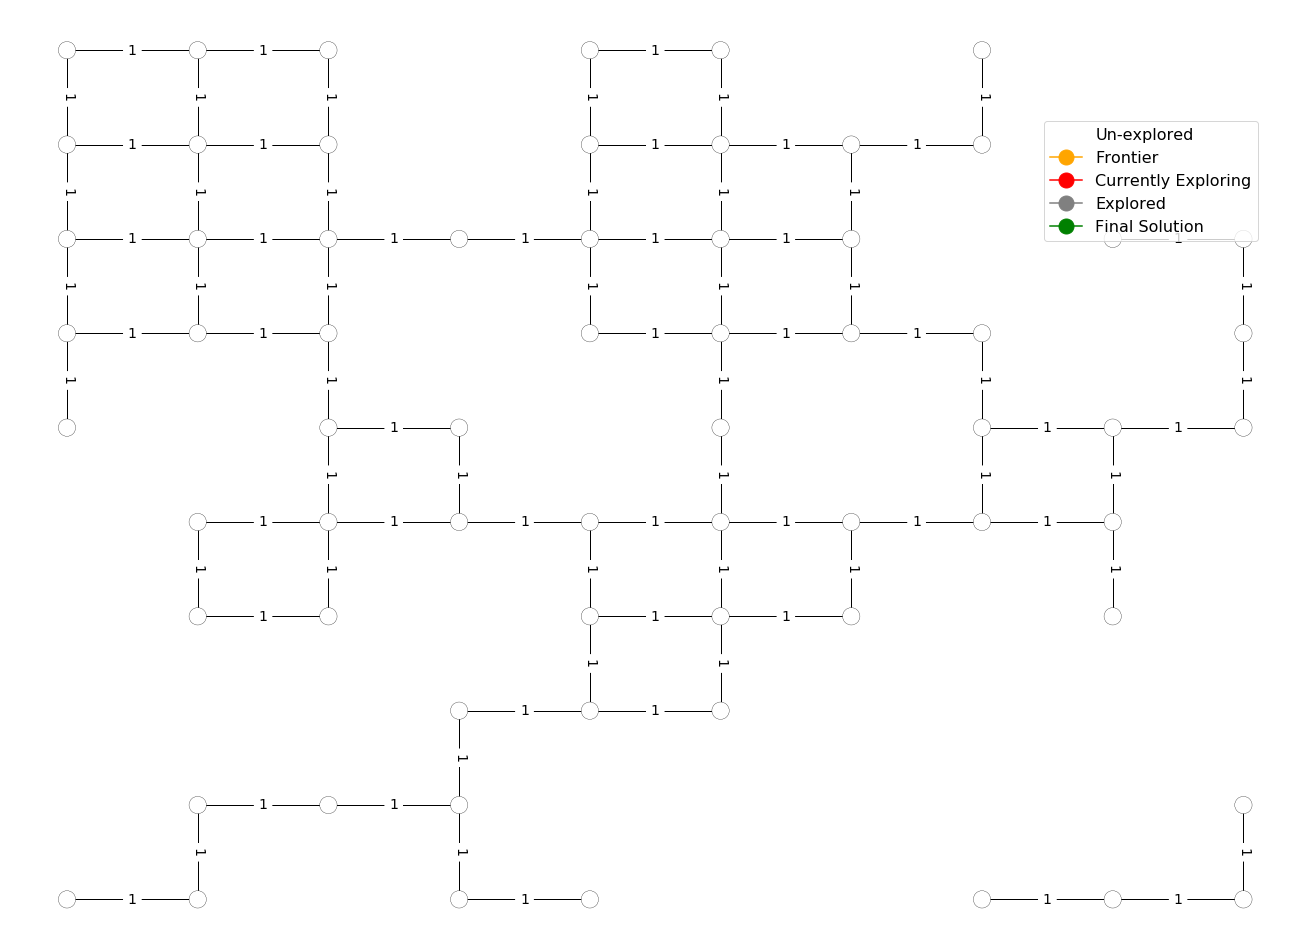

In [75]:
show_map(maze_graph_data)

- <font color=dark-magenta>TASK:</font> Inspect the map and make sure you can map it to Figure 1. I.e. where is S_00_00 ?

In [76]:
#%% md
# at the leftmost and buttom of the graph

----

### Q4.2 Solving the graph problem

Now that the graph/map has been completed in Q4.1.6 (c), we will try to use A-star to find a viable path.

#### Q4.2.1 Define the problem using the AIMA toolbox:

Remember, we want to go from state S_00_00 to S_01_09:

- <font color=dark-magenta>TASK:</font>: Run the follwing code to instantiate the problem


In [77]:
maze_problem = GraphProblem('S_00_00', 'S_01_09', maze_map)

print("Initial state: " + maze_problem.initial)
print("Goal state: "    + maze_problem.goal)

Initial state: S_00_00
Goal state: S_01_09


----

#### Q4.2.2 (a) Define the A-star search function

The cells below defines an implementation of A-star (utilizing a few helper functions from the AIMA toolbox). 


- <font color=dark-magenta>TASK:</font>
 - Inspect the source code for the `serach.py` (or the orginal source in https://github.com/aimacode/aima-python/blob/master/search.py ) and make sure you identify the main steps in the algorithm (e.g. compare to the description in AIMA). Compared to the orginal source, the modified A* function included below allows us to easily plot the solutions etc.

 - Execute the following cells to define the A-star search function 

- Hint: It is fine to just run these cell and more on and potentially inspect the code later!


In [78]:
def my_best_first_graph_search_for_vis(problem, f):
    """Search the nodes with the lowest f scores first.
    You specify the function f(node) that you want to minimize; for example,
    if f is a heuristic estimate to the goal, then we have greedy best
    first search; if f is node.depth then we have breadth-first search.
    There is a subtlety: the line "f = memoize(f, 'f')" means that the f
    values will be cached on the nodes as they are computed. So after doing
    a best first search you can examine the f values of the path returned."""
    
    # we use these two variables at the time of visualisations
    iterations = 0
    all_node_colors = []
    node_colors = {k : 'white' for k in problem.graph.nodes()}
    
    f = memoize(f, 'f')
    node = Node(problem.initial)
    
    node_colors[node.state] = "red"
    iterations += 1
    all_node_colors.append(dict(node_colors))
    
    if problem.goal_test(node.state):
        node_colors[node.state] = "green"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        return(iterations, all_node_colors, node)
    
    frontier = PriorityQueue('min', f)
    frontier.append(node)
    
    node_colors[node.state] = "orange"
    iterations += 1
    all_node_colors.append(dict(node_colors))
    
    explored = set()
    while frontier:
        node = frontier.pop()
        
        node_colors[node.state] = "red"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        
        if problem.goal_test(node.state):
            node_colors[node.state] = "green"
            iterations += 1
            all_node_colors.append(dict(node_colors))
            return(iterations, all_node_colors, node)
        
        explored.add(node.state)
        for child in node.expand(problem):
            if child.state not in explored and child not in frontier:
                frontier.append(child)
                node_colors[child.state] = "orange"
                iterations += 1
                all_node_colors.append(dict(node_colors))
            elif child in frontier:
                incumbent = frontier[child]
                if f(child) < f(incumbent):
                    del frontier[incumbent]
                    frontier.append(child)
                    node_colors[child.state] = "orange"
                    iterations += 1
                    all_node_colors.append(dict(node_colors))

        node_colors[node.state] = "gray"
        iterations += 1
        all_node_colors.append(dict(node_colors))
    return None


In [79]:
def my_astar_search_graph(problem, h=None):
    """A* search is best-first graph search with f(n) = g(n)+h(n).
    You need to specify the h function when you call astar_search, or
    else in your Problem subclass."""
    h = memoize(h or problem.h, 'h')
    iterations, all_node_colors, node = my_best_first_graph_search_for_vis(problem, 
                                                                lambda n: n.path_cost + h(n))
    return(iterations, all_node_colors, node)

----

#### Q4.2.4 Run the solver

##### Q4.2.4 (a) Run the solver - simple trace

The A* functions above is a generic implementation which can take different problems and heuristic functions.

- <font color=dark-magenta>TASK:</font> Execute the follwing cell to run A-star on our particular maze problem and visualize the final solution. 


In [80]:
all_node_colors=[]
iterations, all_node_colors, node = my_astar_search_graph(problem=maze_problem, h=None)

#-- Trace the solution --#
solution_path = [node]
cnode = node.parent
solution_path.append(cnode)
while cnode.state != "S_00_00":    
    cnode = cnode.parent  
    solution_path.append(cnode)

print("----------------------------------------")
print("Identified goal state:"+str(solution_path[0]))
print("----------------------------------------")
print("Solution trace:"+str(solution_path))
print("----------------------------------------")


----------------------------------------
Identified goal state:<Node S_01_09>
----------------------------------------
Solution trace:[<Node S_01_09>, <Node S_01_08>, <Node S_02_08>, <Node S_02_07>, <Node S_02_06>, <Node S_02_05>, <Node S_03_05>, <Node S_03_04>, <Node S_04_04>, <Node S_04_03>, <Node S_04_02>, <Node S_03_02>, <Node S_03_01>, <Node S_02_01>, <Node S_01_01>, <Node S_01_00>, <Node S_00_00>]
----------------------------------------


- <font color=dark-magenta>TASK:</font> Identify the heuristic function used for the Maze problem (you'll need to inspect the code below, `search.py` and specifically the `GraphProblem` class) 


In [81]:
# heuristic function : 
# def h(self, node):
#     """h function is straight-line distance from a node's state to goal."""
#     locs = getattr(self.graph, 'locations', None)
#     if locs:
#         if type(node) is str:
#             return int(distance(locs[node], locs[self.goal]))

#         return int(distance(locs[node.state], locs[self.goal]))
#     else:
#         return infinity

# cost_so_far + (self.graph.get(A, B) or infinity)

----

##### Q4.2.4 (b) Run the solver - full trace [optional]

- You can obtain a full trace of the A-star solution by executing the follwing code with `do_full_visualization=True`. However, be aware that the visualisation is not rendered real-time and it will (typically) be presented as individual figures after the solution has been computed.

In [82]:
do_full_visualization = True
if do_full_visualization:     
    # WARNING the FULL visualisation might not work very well on some computers due to 
    # the large graph and the many iterations required.The visualisaiton will 
    # typically compute the solution and do the plotting at the end - and it often takes a long time ...
    #
    print("::: Full Visualization ::::")
    all_node_colors = []        
    display_visual(maze_graph_data, user_input=False, 
               algorithm=my_astar_search_graph, 
               problem=maze_problem)

::: Full Visualization ::::


interactive(children=(IntSlider(value=0, description='iteration', max=1), Output()), _dom_classes=('widget-int…

interactive(children=(ToggleButton(value=False, description='Visualize'), Output()), _dom_classes=('widget-int…

----

### Q4.3.2 Inspect the solution


- <font color=dark-magenta>TASK:</font> Is the solution returned by the A-star optimal (hint: you may want to lookup the definition of an optimal solution in AIMA)? Is it supposed to be optimal given you knowledge of A-star and the applied heuristic?
- <font color=dark-magenta>TASK:</font> How many optimal solutions are there for this problem ?
- <font color=dark-magenta>TASK [optional]:</font> Dertermine how many nodes are explored with the current heuristic ?

In [83]:
# Task 1: 

----

### Q4.3.3 Heuristic function

#### Q4.3.3 (a) Heuristic function I

- <font color=dark-magenta>TASK:</font>  Modify the heuristic function currently used by A-star and set it to zero for all nodes [note: requires you to insert and/or modify code for example by writing a new h function in this notebook and parse it to my_astar_search_grapgh in Q4.2.4 ]
- <font color=dark-magenta>TASK:</font>  Rerun the A-star solver and inspect the solution - determine if and how the heuristic function has changed the solution (i.e. is it still a valid solution, is it optimal, etc)? How many nodes did it explore ?
- <font color=dark-magenta>TASK:</font>  A-star with $h(n)=0\,\forall n$ corresponds to a basic search method - which one (breadth first search, depth first search, uniform cost search, hill-climbing, etc) ?

---

#### Q4.3.3 (b) Heuristic function II [optional]

- <font color=dark-magenta>TASK:</font>  Change the heuristic function currently used by A-star into a inconsistent heuristic (i.e. you may want to look up the definition of a consistent heuristic in AIMA) [note: require you to insert/modify code]
- <font color=dark-magenta>TASK:</font>  Rerun the A-star solver. Determine if and how the heuristic function has changed the solution (i.e. is it still a valid solution, is it optimal, etc)?

----

### Q4.4 Open AI Gym [open-ended challange]
Hint: It will probably take an average student 1h to solve this part. 

**Introduction**: Recall the Open AI Gym FrozenLake problem in Week 2 ? 
We will try to solve the maze problem but this time make sure that it is a deterministic environment (a key assumption for A-star to work).

- <font color=dark-magenta>TASK:</font> Solve the 'FrozenLake8x8-v0' problem using A-star with the default heuristic function assuming . You may find the code snippets and helper funciton included below usefull. 

In [84]:
import gym
env = gym.make('FrozenLake8x8-v0',is_slippery=False)
env.render()


SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG


In [107]:
def env2statespace(env):
    """ 
    This simple parser demonstrates how you can extract the state space from the Open AI env

    We *assume* full observability, i.e., we can directly ignore Hole states. Alternatively, 
    we could place a very high step cost to a Hole state or use a directed representation 
    (i.e., you can go to a Hole state but never return). Feel free to experiment with both if time permits.

    Input:
        env: an Open AI Env follwing the std in the FrozenLake-v0 env

    Output:
        state_space_locations : a dict with the available states
        state_space_actions   : a dict of dict with available actions in each state
        state_start_id        : the start state
        state_goal_id         : the goal state  

        These objects are enough to define a Graph problem using the AIMA toolbox, e.g., using  
        UndirectedGraph, GraphProblem and astar_search (as in AI (H) Lab 3)

    Notice: the implementation is very explicit to demonstarte all the steps (it could be made more elegant!)
    
    bjorn.jensen@glasgow.ac.uk
    
    """
    state_space_locations = {} # create a dict
    for i in range(env.desc.shape[0]):
        for j in range(env.desc.shape[1]):   
            if not (b'H' in env.desc[i,j]):
                state_id = "S_"+str(int(i))+"_"+str(int(j) )
                state_space_locations[state_id] = (int(i),int(j))
                if env.desc[i,j] == b'S':
                    state_initial_id = state_id                                                 
                elif env.desc[i,j] == b'G':
                    state_goal_id = state_id                      

                #-- Generate state / action list --#
                # First define the set of actions in the defined coordinate system             
                actions = {"west": [-1,0],"east": [+1,0],"north": [0,+1], "south": [0,-1]}
                state_space_actions = {}
                for state_id in state_space_locations:                                       
                    possible_states = {}
                    for action in actions:
                        #-- Check if a specific action is possible --#
                        delta = actions.get(action)
                        state_loc = state_space_locations.get(state_id)
                        state_loc_post_action = [state_loc[0]+delta[0],state_loc[1]+delta[1]]

                        #-- Check if the new possible state is in the state_space, i.e., is accessible --#
                        state_id_post_action = "S_"+str(state_loc_post_action[0])+"_"+str(state_loc_post_action[1])                        
                        if state_space_locations.get(state_id_post_action) != None:
                            possible_states[state_id_post_action] = 1 
                        
                    #-- Add the possible actions for this state to the global dict --#                              
                    state_space_actions[state_id] = possible_states

    return state_space_locations, state_space_actions, state_initial_id, state_goal_id

In [108]:
# Create a dict representation of the state space
state_space_locations, state_space_actions, state_initial_id, state_goal_id = env2statespace(env)

In [109]:
# Ouput so we can validate the representation
state_space_locations, state_space_actions, state_initial_id, state_goal_id

({'S_0_0': (0, 0),
  'S_0_1': (0, 1),
  'S_0_2': (0, 2),
  'S_0_3': (0, 3),
  'S_0_4': (0, 4),
  'S_0_5': (0, 5),
  'S_0_6': (0, 6),
  'S_0_7': (0, 7),
  'S_1_0': (1, 0),
  'S_1_1': (1, 1),
  'S_1_2': (1, 2),
  'S_1_3': (1, 3),
  'S_1_4': (1, 4),
  'S_1_5': (1, 5),
  'S_1_6': (1, 6),
  'S_1_7': (1, 7),
  'S_2_0': (2, 0),
  'S_2_1': (2, 1),
  'S_2_2': (2, 2),
  'S_2_4': (2, 4),
  'S_2_5': (2, 5),
  'S_2_6': (2, 6),
  'S_2_7': (2, 7),
  'S_3_0': (3, 0),
  'S_3_1': (3, 1),
  'S_3_2': (3, 2),
  'S_3_3': (3, 3),
  'S_3_4': (3, 4),
  'S_3_6': (3, 6),
  'S_3_7': (3, 7),
  'S_4_0': (4, 0),
  'S_4_1': (4, 1),
  'S_4_2': (4, 2),
  'S_4_4': (4, 4),
  'S_4_5': (4, 5),
  'S_4_6': (4, 6),
  'S_4_7': (4, 7),
  'S_5_0': (5, 0),
  'S_5_3': (5, 3),
  'S_5_4': (5, 4),
  'S_5_5': (5, 5),
  'S_5_7': (5, 7),
  'S_6_0': (6, 0),
  'S_6_2': (6, 2),
  'S_6_3': (6, 3),
  'S_6_5': (6, 5),
  'S_6_7': (6, 7),
  'S_7_0': (7, 0),
  'S_7_1': (7, 1),
  'S_7_2': (7, 2),
  'S_7_4': (7, 4),
  'S_7_5': (7, 5),
  'S_7_6': (

In [110]:
# Insert the solution here to find and output the solution using A-star
frozen_map = UndirectedGraph(state_space_actions)
frozen_problem = GraphProblem('S_0_0', 'S_7_7', frozen_map)
all_node_colors=[]
iterations, all_node_colors, node = my_astar_search_graph(problem=frozen_problem, h=None)

#-- Trace the solution --#
solution_path = [node]
cnode = node.parent
solution_path.append(cnode)
while cnode.state != 'S_0_0':    
    cnode = cnode.parent  
    solution_path.append(cnode)

print("----------------------------------------")
print("Identified goal state:"+str(solution_path[0]))
print("----------------------------------------")
print("Solution trace:"+str(solution_path))
print("----------------------------------------")

----------------------------------------
Identified goal state:<Node S_7_7>
----------------------------------------
Solution trace:[<Node S_7_7>, <Node S_6_7>, <Node S_5_7>, <Node S_4_7>, <Node S_3_7>, <Node S_2_7>, <Node S_1_7>, <Node S_0_7>, <Node S_0_6>, <Node S_0_5>, <Node S_0_4>, <Node S_0_3>, <Node S_0_2>, <Node S_0_1>, <Node S_0_0>]
----------------------------------------


In [111]:
state_space_locations

{'S_0_0': (0, 0),
 'S_0_1': (0, 1),
 'S_0_2': (0, 2),
 'S_0_3': (0, 3),
 'S_0_4': (0, 4),
 'S_0_5': (0, 5),
 'S_0_6': (0, 6),
 'S_0_7': (0, 7),
 'S_1_0': (1, 0),
 'S_1_1': (1, 1),
 'S_1_2': (1, 2),
 'S_1_3': (1, 3),
 'S_1_4': (1, 4),
 'S_1_5': (1, 5),
 'S_1_6': (1, 6),
 'S_1_7': (1, 7),
 'S_2_0': (2, 0),
 'S_2_1': (2, 1),
 'S_2_2': (2, 2),
 'S_2_4': (2, 4),
 'S_2_5': (2, 5),
 'S_2_6': (2, 6),
 'S_2_7': (2, 7),
 'S_3_0': (3, 0),
 'S_3_1': (3, 1),
 'S_3_2': (3, 2),
 'S_3_3': (3, 3),
 'S_3_4': (3, 4),
 'S_3_6': (3, 6),
 'S_3_7': (3, 7),
 'S_4_0': (4, 0),
 'S_4_1': (4, 1),
 'S_4_2': (4, 2),
 'S_4_4': (4, 4),
 'S_4_5': (4, 5),
 'S_4_6': (4, 6),
 'S_4_7': (4, 7),
 'S_5_0': (5, 0),
 'S_5_3': (5, 3),
 'S_5_4': (5, 4),
 'S_5_5': (5, 5),
 'S_5_7': (5, 7),
 'S_6_0': (6, 0),
 'S_6_2': (6, 2),
 'S_6_3': (6, 3),
 'S_6_5': (6, 5),
 'S_6_7': (6, 7),
 'S_7_0': (7, 0),
 'S_7_1': (7, 1),
 'S_7_2': (7, 2),
 'S_7_4': (7, 4),
 'S_7_5': (7, 5),
 'S_7_6': (7, 6),
 'S_7_7': (7, 7)}

----

- <font color=dark-magenta>TASK:</font> Check that the solution found by A-star is correct and execute it in the Open AI Env.   

In [113]:
# Insert the solution here; note this will be several lines of code (10-20)
frozen_map.locations = state_space_locations

node_colors = {node: 'white' for node in frozen_map.locations.keys()}
node_positions = frozen_map.locations
node_label_pos = { k:[v[0],v[1]-10]  for k,v in frozen_map.locations.items() }
edge_weights = {(k, k2) : v2 for k, v in frozen_map.graph_dict.items() for k2, v2 in v.items()}

frozen_map_data = {  'graph_dict' : frozen_map.graph_dict,
                        'node_colors': node_colors,
                        'node_positions': node_positions,
                        'node_label_positions': node_label_pos,
                         'edge_weights': edge_weights
                     }

do_full_visualization = True
if do_full_visualization:     
    # WARNING the FULL visualisation might not work very well on some computers due to 
    # the large graph and the many iterations required.The visualisaiton will 
    # typically compute the solution and do the plotting at the end - and it often takes a long time ...
    #
    print("::: Full Visualization ::::")
    all_node_colors = []        
    display_visual(frozen_map_data, user_input=False, 
               algorithm=my_astar_search_graph, 
               problem=frozen_problem)

::: Full Visualization ::::


interactive(children=(IntSlider(value=0, description='iteration', max=1), Output()), _dom_classes=('widget-int…

interactive(children=(ToggleButton(value=False, description='Visualize'), Output()), _dom_classes=('widget-int…

---